<a href="https://colab.research.google.com/github/2303A52481/AIML_2303A52481/blob/main/LABEXAM_2481.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
file_path = '/content/Real estate valuation data set.csv'
data = pd.read_csv(file_path)

# Rename columns for better readability
data.columns = [
    'No', 'transaction_date', 'house_age', 'nearest_MRT_station',
    'num_convenience_stores', 'latitude', 'longitude', 'house_price_per_unit_area'
]



In [12]:
# 1. Identify the top 5 house age values with the highest estate values
top_5_house_age = data.groupby('house_age')['house_price_per_unit_area'].mean().sort_values(ascending=False).head(5)
print("Top 5 house ages with highest average estate values:")
print(top_5_house_age)


Top 5 house ages with highest average estate values:
house_age
10.8    117.5
37.2     78.3
35.4     78.0
41.4     63.3
5.3      63.2
Name: house_price_per_unit_area, dtype: float64



Correlation between features and house price per unit area:
                           nearest_MRT_station  num_convenience_stores  \
nearest_MRT_station                   1.000000               -0.602519   
num_convenience_stores               -0.602519                1.000000   
house_price_per_unit_area            -0.673613                0.571005   

                           house_price_per_unit_area  
nearest_MRT_station                        -0.673613  
num_convenience_stores                      0.571005  
house_price_per_unit_area                   1.000000  


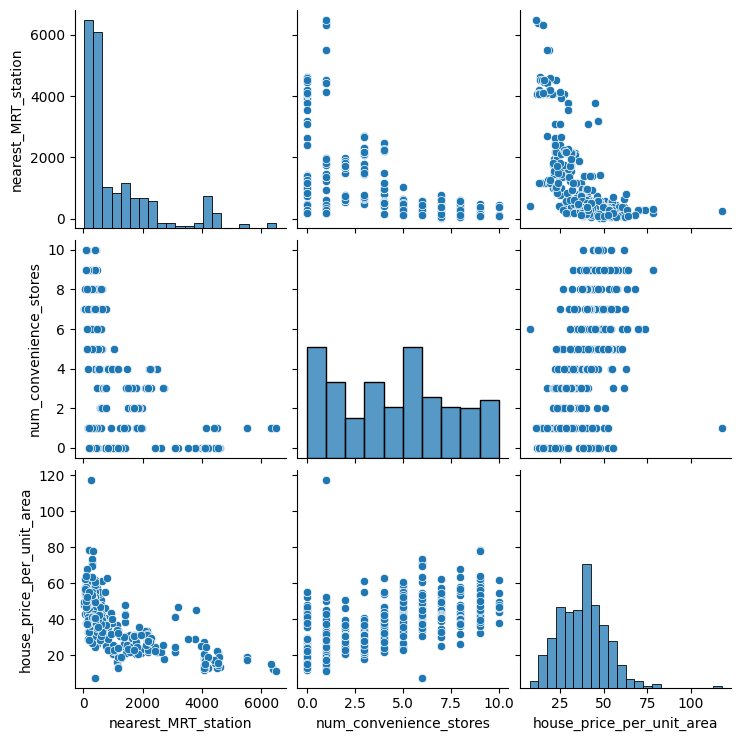

In [13]:
# 2. Analyze if MRT station, stores contribute to real estate value
# Correlation analysis
correlation_matrix = data[['nearest_MRT_station', 'num_convenience_stores', 'house_price_per_unit_area']].corr()
print("\nCorrelation between features and house price per unit area:")
print(correlation_matrix)

# Visualization to explore the impact of MRT stations and stores on real estate value
sns.pairplot(data[['nearest_MRT_station', 'num_convenience_stores', 'house_price_per_unit_area']])
plt.show()

In [14]:
# 3. Identify the maximum and minimum house prices per unit area
max_price = data['house_price_per_unit_area'].max()
min_price = data['house_price_per_unit_area'].min()
print(f"\nMaximum house price per unit area: {max_price}")
print(f"Minimum house price per unit area: {min_price}")



Maximum house price per unit area: 117.5
Minimum house price per unit area: 7.6


In [15]:
# 4. Predict the date when most transactions happened
# Convert transaction date from float format to a proper date
data['transaction_date'] = pd.to_datetime((data['transaction_date'] - 2010) * 365, origin='2010-01-01', unit='D')
most_transactions_date = data['transaction_date'].mode()[0]
print(f"\nThe date with the most transactions is: {most_transactions_date}")



The date with the most transactions is: 2013-06-01 04:55:11.999997321



Closest MRT station distance for high value properties: 23.38284
Maximum number of stores near high value properties: 10


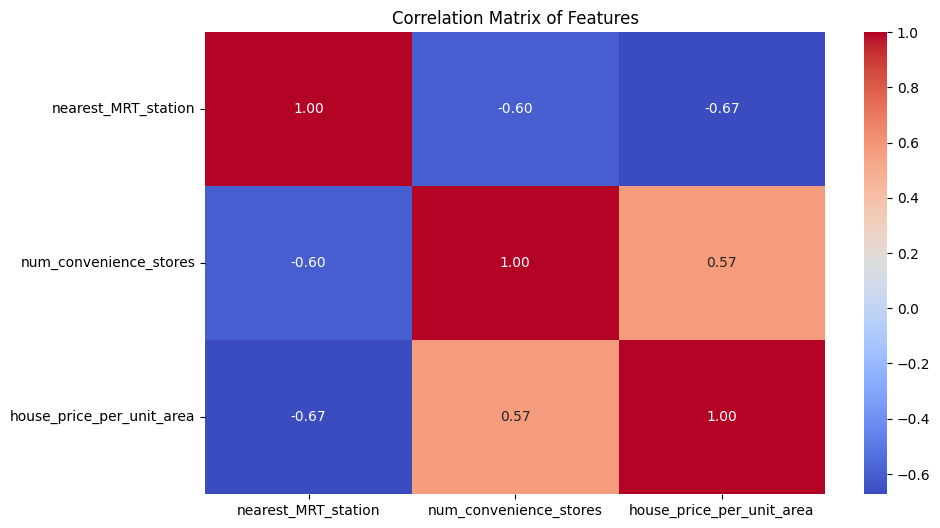

In [16]:
# 5. Identify the closest distance perimeter for MRT stations and stores for high real estate value
# Considering high value properties as the top 25% based on house price per unit area
high_value_threshold = data['house_price_per_unit_area'].quantile(0.75)
high_value_data = data[data['house_price_per_unit_area'] >= high_value_threshold]

# Closest distances and maximum number of stores for high value properties
closest_MRT_station = high_value_data['nearest_MRT_station'].min()
max_stores = high_value_data['num_convenience_stores'].max()
print(f"\nClosest MRT station distance for high value properties: {closest_MRT_station}")
print(f"Maximum number of stores near high value properties: {max_stores}")

# Visualization of correlation between variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()